# Bank transactions

To get started let's import some libraries and take a look at our dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="dark")

df = pd.read_csv('transactions_dataset.csv')
print(df.shape)
df.head()

(30219, 7)


,t_id,acc_date,amount,fee,t_type,balance_date,acc_id
0,0,2021-03-22 17:32:34,5000.00,9.9,TYPE_1,2021-06-15 19:17:52,1
1,1,2021-03-11 21:25:57,390.40,9.9,TYPE_1,2021-06-29 11:16:25,2
2,2,2021-06-15 13:05:43,60.45,0.0,TYPE_4,2021-08-27 22:33:16,3
3,3,2021-02-26 20:47:01,7000.00,9.9,TYPE_1,2021-04-16 18:29:28,4
4,4,2021-03-09 02:33:58,3990.00,9.9,TYPE_1,2021-07-12 14:45:40,5


The dataset we'll be exploring is a small fintech startup transactions dataset where each line is a transaction made by a user.

Let's start answering the questions.

## Q3. The fintech is facing some database maintanence challenges that causes a need to take down the server for a couple hours. When would be the least caotic day of the week and time to do that?

Let's take a look at how the transactions are spread over the week days.

In [2]:
# transform balance_date column into datetime format
df.balance_date = pd.to_datetime(df.balance_date)

In [3]:
# create a weekday column
weekday_dict={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['week_day'] = df['balance_date'].dt.dayofweek.map(weekday_dict)

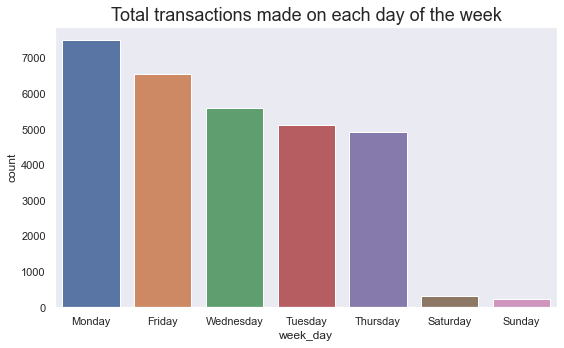

In [4]:
# number of transactions on each weekday over the last year
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x=df.week_day, ax=ax, order=df.week_day.value_counts().index)
ax.set_title('Total transactions made on each day of the week', fontsize=18)
plt.tight_layout()

The number of transactions made during the weekends (Sat and Sun) are much lower than during the week.

Now let's take a look at the time of the day.

In [5]:
t = df.groupby(df.balance_date.dt.hour)['t_id'].count().reset_index()
t = t.rename(columns={'balance_date': 'hour_of_day', 't_id': 'count'})
t.sort_values('count', ascending=True)[:5]

,hour_of_day,count
7,7,2
8,8,2
6,6,13
4,4,43
5,5,43


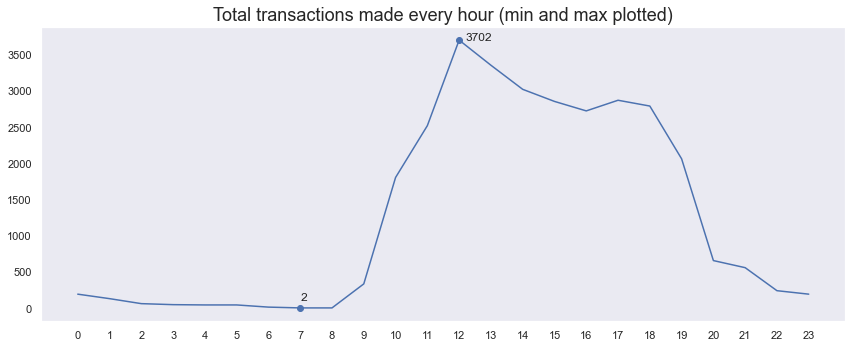

In [6]:
fig, ax = plt.subplots(figsize=(12,5))

t['count'].plot(ax=ax)
ax.set_title("Total transactions made every hour (min and max plotted)", size=18)

x_min = t[(t['count'] == t['count'].min())].hour_of_day.to_list()[0]
y_min = t['count'].min()

x_max = t[(t['count'] == t['count'].max())].hour_of_day.to_list()[0]
y_max = t['count'].max()

plt.xticks(t.hour_of_day)
plt.plot(x_min, y_min, 'bo')
plt.plot(x_max, y_max, 'bo')
plt.annotate(y_min, (x_min,(y_min+100)))
plt.annotate(y_max, (x_max+.2,(y_max)))

plt.tight_layout()

Overall the busiest times for transactions are from 10am til 7pm and the less busy times are from 10pm til 8am.

Let's take a look at the less busy day's (Sunday) times and determine a time window for the maintanence.

In [7]:
# make a copy of the dataframe only with transactions made on sundays
df_sunday = df.copy()
df_sunday = df_sunday[df_sunday.week_day.astype('str') == 'Sunday']

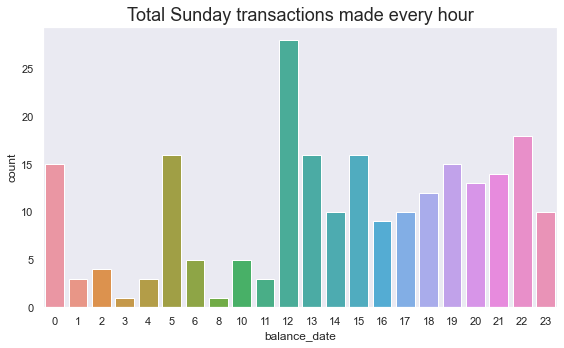

In [8]:
# quantidade de transações realizadas em cada hora dos domingos
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x=df_sunday.balance_date.dt.hour, ax=ax)
ax.set_title("Total Sunday transactions made every hour", fontsize=18)
plt.tight_layout()

The less busy time window on a Sunday is usually from 1am til 4am or from 6am til 11am.

Those would be ok time windows to perform database maintainence and have as little customer friction as possible.